# import import bang

In [1]:
import multiplewatermark
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from PIL import Image, ImageFilter
from skimage.util import random_noise
# from tqdm import tqdm


In [ ]:
importlib.reload(multiplewatermark)


# tester

In [ ]:
importlib.reload(multiplewatermark)

outsideShape = (40, 40)
factor = 20
bitPerPart = 8
radius = 10

imageData = multiplewatermark.readImage("test-2000x2000.png")
preCalcFragileWatermark = multiplewatermark.processEmbedFragileWatermarkColor(
    imageData=imageData, password="thor", outsideImageSize=outsideShape)
watermarked = multiplewatermark.processEmbedMultipleWatermarkColor(
    imageData=imageData, password="thor", outsideImageSize=outsideShape, factor=factor, show=False, save=False, dir="watermarked", out="watermarked.png", bitPerPart=bitPerPart, radius=radius, preCalcFragileWatermark=preCalcFragileWatermark, mode="NORMAL")
watermarked = multiplewatermark.processEmbedMultipleWatermarkColor(
    imageData=imageData, password="thor", outsideImageSize=outsideShape, factor=factor, show=False, save=False, dir="watermarked", out="watermarked.png", bitPerPart=bitPerPart, radius=radius, preCalcFragileWatermark=preCalcFragileWatermark, mode="NORMAL")
multiplewatermark.processExtractMultipleWatermarkColor(
    watermarked, imageData, "thor", outsideShape, factor, bitPerPart, radius)


# common helper

In [ ]:
SEPARATOR = "-"


def isSkip(outsideShape, radius):
    if (radius*2 >= min(outsideShape)):
        return True
    return False


def createFileName(outsideShape, factor, bitPerPart, radius):
    return str(outsideShape[0]) + SEPARATOR + str(outsideShape[1]) + SEPARATOR + str(factor) + \
        SEPARATOR + str(bitPerPart) + SEPARATOR + str(radius) + ".png"


# watermark insertion 

In [ ]:
outsideShapeList = [(10, 10), (20, 20), (40, 40), (50, 50),
                    (100, 100), (200, 200), (250, 250), (500, 500)]
factorList = [1] + [i for i in range(10, 101, 10)]
bitPerPartList = [4, 8, 16, 32, 64, 128]

filenameDF = []
outsideShapeDF = []
factorDF = []
bitPerPartDf = []
radiusDF = []
psnrDF = []

pbar_outsideShape = tqdm(total=len(outsideShapeList),
                         desc="outside shape", position=0)
pbar_radius = tqdm(desc="radius", position=1)
pbar_factor = tqdm(total=len(factorList), desc="factor", position=2)
pbar_bitPerPart = tqdm(total=len(bitPerPartList),
                       desc="bit per part", position=3)

imageData = multiplewatermark.readImage("test-2000x2000.png")
for outsideShape in outsideShapeList:
    pbar_outsideShape.set_description(
        desc="outside shape " + str(outsideShape))
    step = min(outsideShape) // 10
    if step < 1:
        step = 1
    radiusList = [i for i in range(1, (min(outsideShape) // 2) - 2, step)]
    preCalcFragileWatermark = multiplewatermark.processEmbedFragileWatermarkColor(
        imageData=imageData, password="thor", outsideImageSize=outsideShape)
    pbar_radius.reset(total=len(radiusList))
    for radius in radiusList:
        pbar_radius.set_description(desc="radius " + str(radius))
        if (isSkip(outsideShape=outsideShape, radius=radius)):
            continue
        pbar_factor.reset()
        for factor in factorList:
            pbar_factor.set_description(desc="factor " + str(factor))
            pbar_bitPerPart.reset()
            for bitPerPart in bitPerPartList:
                pbar_bitPerPart.set_description(
                    desc="bit per part " + str(bitPerPart))
                filename = createFileName(
                    outsideShape, factor, bitPerPart, radius)
                watermarked = multiplewatermark.processEmbedMultipleWatermarkColor(
                    imageData=imageData, password="thor", outsideImageSize=outsideShape, factor=factor, show=False, save=True, dir="watermarked/test-2000x2000", out=filename, bitPerPart=bitPerPart, radius=radius, mode="NORMAL", preCalcFragileWatermark=preCalcFragileWatermark)
                psnr = multiplewatermark.psnr(imageData, watermarked)
                outsideShapeDF.append(outsideShape)
                factorDF.append(factor)
                bitPerPartDf.append(bitPerPart)
                radiusDF.append(radius)
                psnrDF.append(psnr)
                filenameDF.append(filename)
                pbar_bitPerPart.update()
            pbar_factor.update()
        pbar_radius.update()
    pbar_outsideShape.update()

pbar_outsideShape.close
pbar_radius.close()
pbar_factor.close()
pbar_bitPerPart.close()


dict = {
    "filename": filenameDF,
    "outsideShape": outsideShapeDF,
    "factor": factorDF,
    "bitPerPart": bitPerPartDf,
    "radius": radiusDF,
    "psnr": psnrDF
}
df = pd.DataFrame(dict)
df.to_csv("2000x2000.csv")
print(df)


In [ ]:
outsideShapeList = [(10, 10), (20, 20), (40, 40), (50, 50),
                    (100, 100), (200, 200), (250, 250)]
factorList = [1] + [i for i in range(10, 101, 10)]
bitPerPartList = [4, 8, 16, 32, 64]

filenameDF = []
outsideShapeDF = []
factorDF = []
bitPerPartDf = []
radiusDF = []
psnrDF = []

pbar_outsideShape = tqdm(total=len(outsideShapeList),
                         desc="outside shape", position=0)
pbar_radius = tqdm(desc="radius", position=1)
pbar_factor = tqdm(total=len(factorList), desc="factor", position=2)
pbar_bitPerPart = tqdm(total=len(bitPerPartList),
                       desc="bit per part", position=3)

imageData = multiplewatermark.readImage("test-1000x1000.png")
for outsideShape in outsideShapeList:
    pbar_outsideShape.set_description(
        desc="outside shape " + str(outsideShape))
    step = min(outsideShape) // 10
    if step < 1:
        step = 1
    radiusList = [i for i in range(1, (min(outsideShape) // 2) - 2, step)]
    preCalcFragileWatermark = multiplewatermark.processEmbedFragileWatermarkColor(
        imageData=imageData, password="thor", outsideImageSize=outsideShape)
    pbar_radius.reset(total=len(radiusList))
    for radius in radiusList:
        pbar_radius.set_description(desc="radius " + str(radius))
        if (isSkip(outsideShape=outsideShape, radius=radius)):
            continue
        pbar_factor.reset()
        for factor in factorList:
            pbar_factor.set_description(desc="factor " + str(factor))
            pbar_bitPerPart.reset()
            for bitPerPart in bitPerPartList:
                pbar_bitPerPart.set_description(
                    desc="bit per part " + str(bitPerPart))
                filename = createFileName(
                    outsideShape, factor, bitPerPart, radius)
                watermarked = multiplewatermark.processEmbedMultipleWatermarkColor(
                    imageData=imageData, password="thor", outsideImageSize=outsideShape, factor=factor, show=False, save=True, dir="watermarked/test-1000x1000", out=filename, bitPerPart=bitPerPart, radius=radius, mode="NORMAL", preCalcFragileWatermark=preCalcFragileWatermark)
                psnr = multiplewatermark.psnr(imageData, watermarked)
                outsideShapeDF.append(outsideShape)
                factorDF.append(factor)
                bitPerPartDf.append(bitPerPart)
                radiusDF.append(radius)
                psnrDF.append(psnr)
                filenameDF.append(filename)
                pbar_bitPerPart.update()
            pbar_factor.update()
        pbar_radius.update()
    pbar_outsideShape.update()

pbar_outsideShape.close
pbar_radius.close()
pbar_factor.close()
pbar_bitPerPart.close()


dict = {
    "filename": filenameDF,
    "outsideShape": outsideShapeDF,
    "factor": factorDF,
    "bitPerPart": bitPerPartDf,
    "radius": radiusDF,
    "psnr": psnrDF
}
df = pd.DataFrame(dict)
df.to_csv("1000x1000.csv")
print(df)


In [ ]:
outsideShapeList = [(10, 10), (20, 20), (50, 50),
                    (100, 100)]
factorList = [1] + [i for i in range(10, 101, 10)]
bitPerPartList = [4, 8, 16, 32]

filenameDF = []
outsideShapeDF = []
factorDF = []
bitPerPartDf = []
radiusDF = []
psnrDF = []

pbar_outsideShape = tqdm(total=len(outsideShapeList),
                         desc="outside shape", position=0)
pbar_radius = tqdm(desc="radius", position=1)
pbar_factor = tqdm(total=len(factorList), desc="factor", position=2)
pbar_bitPerPart = tqdm(total=len(bitPerPartList),
                       desc="bit per part", position=3)

imageData = multiplewatermark.readImage("test-500x500.png")
for outsideShape in outsideShapeList:
    pbar_outsideShape.set_description(
        desc="outside shape " + str(outsideShape))
    step = min(outsideShape) // 10
    if step < 1:
        step = 1
    radiusList = [i for i in range(1, (min(outsideShape) // 2) - 2, step)]
    preCalcFragileWatermark = multiplewatermark.processEmbedFragileWatermarkColor(
        imageData=imageData, password="thor", outsideImageSize=outsideShape)
    pbar_radius.reset(total=len(radiusList))
    for radius in radiusList:
        pbar_radius.set_description(desc="radius " + str(radius))
        if (isSkip(outsideShape=outsideShape, radius=radius)):
            continue
        pbar_factor.reset()
        for factor in factorList:
            pbar_factor.set_description(desc="factor " + str(factor))
            pbar_bitPerPart.reset()
            for bitPerPart in bitPerPartList:
                pbar_bitPerPart.set_description(
                    desc="bit per part " + str(bitPerPart))
                filename = createFileName(
                    outsideShape, factor, bitPerPart, radius)
                watermarked = multiplewatermark.processEmbedMultipleWatermarkColor(
                    imageData=imageData, password="thor", outsideImageSize=outsideShape, factor=factor, show=False, save=True, dir="watermarked/test-500x500", out=filename, bitPerPart=bitPerPart, radius=radius, mode="NORMAL", preCalcFragileWatermark=preCalcFragileWatermark)
                psnr = multiplewatermark.psnr(imageData, watermarked)
                outsideShapeDF.append(outsideShape)
                factorDF.append(factor)
                bitPerPartDf.append(bitPerPart)
                radiusDF.append(radius)
                psnrDF.append(psnr)
                filenameDF.append(filename)
                pbar_bitPerPart.update()
            pbar_factor.update()
        pbar_radius.update()
    pbar_outsideShape.update()

pbar_outsideShape.close
pbar_radius.close()
pbar_factor.close()
pbar_bitPerPart.close()


dict = {
    "filename": filenameDF,
    "outsideShape": outsideShapeDF,
    "factor": factorDF,
    "bitPerPart": bitPerPartDf,
    "radius": radiusDF,
    "psnr": psnrDF
}
df = pd.DataFrame(dict)
df.to_csv("500x500.csv")
print(df)


# test extract watermark

In [ ]:
df = pd.read_csv("500x500-1.csv", index_col=0)
originalImageData = multiplewatermark.readImage("test-500x500.png")
imageData = multiplewatermark.readImage(
    "watermarked/test-500x500/" + df.loc[0]["filename"])
originalImageDataYUV = multiplewatermark.rgbToYUV(originalImageData)
imageDataYUV = multiplewatermark.rgbToYUV(imageData)

outsideImageSize = tuple(map(int, df.loc[0]["outsideShape"][1:-1].split(', ')))
factor = int(df.loc[0]["factor"])
bitPerPart = int(df.loc[0]["bitPerPart"])
radius = int(df.loc[0]["radius"])

_, outsideImageDataY = multiplewatermark.splitImage(
    imageDataYUV[:, :, 0], outsideImageSize)
_, originalOutsideImageDataY = multiplewatermark.splitImage(
    originalImageDataYUV[:, :, 0], outsideImageSize)

robustCheckResult = multiplewatermark.processExtractRobustWatermark(
    outsideImageDataY, originalOutsideImageDataY, "thor", factor, bitPerPart, radius)

print(outsideImageSize)
print(factor)
print(bitPerPart)
print(radius)
print(robustCheckResult)
print(df.loc[0])


In [ ]:
def checkFromDfJPGVer(data, originalImageFile, watermarkImageLoc, csvSave, skipFragile = False):
    originalImageData = multiplewatermark.readImage(originalImageFile)
    originalImageDataYUV = multiplewatermark.rgbToYUV(originalImageData)
    robust = []
    fragileR = []
    fragileG = []
    fragileB = []

    prevImageSize = (-1, -1)
    for _, data in tqdm(df.iterrows(), total=df.shape[0]):
        filename = data["filename"].split(".")
        filename = filename[0] + ".jpg"

        imageData = multiplewatermark.readImage(
            watermarkImageLoc + filename)

        imageDataYUV = multiplewatermark.rgbToYUV(imageData)
        outsideImageSize = tuple(
            map(int, data["outsideShape"][1:-1].split(', ')))
        factor = int(data["factor"])
        bitPerPart = int(data["bitPerPart"])
        radius = int(data["radius"])

        _, originalOutsideImageDataY = multiplewatermark.splitImage(
            originalImageDataYUV[:, :, 0], outsideImageSize)
        _, outsideImageDataY = multiplewatermark.splitImage(
            imageDataYUV[:, :, 0], outsideImageSize)

        robustCheckResult = multiplewatermark.processExtractRobustWatermark(
            outsideImageDataY, originalOutsideImageDataY, "thor", factor, bitPerPart, radius)
        robust.append(robustCheckResult)

        if(not skipFragile):
            if(prevImageSize != outsideImageSize):
                insideImageDataR, _ = multiplewatermark.splitImage(
                    imageData[:, :, 0], outsideImageSize, multiplewatermark.INSIDE_ONLY)
                insideImageDataG, _ = multiplewatermark.splitImage(
                    imageData[:, :, 1], outsideImageSize, multiplewatermark.INSIDE_ONLY)
                insideImageDataB, _ = multiplewatermark.splitImage(
                    imageData[:, :, 2], outsideImageSize, multiplewatermark.INSIDE_ONLY)
                extractedFragileR = multiplewatermark.extractFragileWatermark(
                    insideImageDataR, "thor")
                extractedFragileG = multiplewatermark.extractFragileWatermark(
                    insideImageDataG, "thor")
                extractedFragileB = multiplewatermark.extractFragileWatermark(
                    insideImageDataB, "thor")
                prevImageSize = outsideImageSize

            fragileR.append(np.average(extractedFragileR))
            fragileG.append(np.average(extractedFragileG))
            fragileB.append(np.average(extractedFragileB))

    df["robustCheck"] = robust
    
    if not skipFragile:
        df["fragileRedCheck"] = fragileR
        df["fragileGreenCheck"] = fragileG
        df["fragileBlueCheck"] = fragileB
    df.to_csv(csvSave)

In [ ]:
df = pd.read_csv("500x500-1.csv", index_col=0)
originalImageData = multiplewatermark.readImage("test-500x500.png")
originalImageDataYUV = multiplewatermark.rgbToYUV(originalImageData)
robust = []
fragileR = []
fragileG = []
fragileB = []

prevImageSize = (-1, -1)
for i, data in tqdm(df.iterrows(), total=df.shape[0]):
    imageData = multiplewatermark.readImage(
        "watermarked/test-500x500/" + data["filename"])

    imageDataYUV = multiplewatermark.rgbToYUV(imageData)
    outsideImageSize = tuple(
        map(int, data["outsideShape"][1:-1].split(', ')))
    factor = int(data["factor"])
    bitPerPart = int(data["bitPerPart"])
    radius = int(data["radius"])

    _, originalOutsideImageDataY = multiplewatermark.splitImage(
        originalImageDataYUV[:, :, 0], outsideImageSize)
    _, outsideImageDataY = multiplewatermark.splitImage(
        imageDataYUV[:, :, 0], outsideImageSize)

    robustCheckResult = multiplewatermark.processExtractRobustWatermark(
        outsideImageDataY, originalOutsideImageDataY, "thor", factor, bitPerPart, radius)

    # if(prevImageSize != outsideImageSize):
    if (True):
        # print("running fragile check")
        insideImageDataR, _ = multiplewatermark.splitImage(
            imageData[:, :, 0], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        insideImageDataG, _ = multiplewatermark.splitImage(
            imageData[:, :, 1], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        insideImageDataB, _ = multiplewatermark.splitImage(
            imageData[:, :, 2], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        extractedFragileR = multiplewatermark.extractFragileWatermark(
            insideImageDataR, "thor")
        extractedFragileG = multiplewatermark.extractFragileWatermark(
            insideImageDataG, "thor")
        extractedFragileB = multiplewatermark.extractFragileWatermark(
            insideImageDataB, "thor")
        prevImageSize = outsideImageSize

    robust.append(robustCheckResult)
    fragileR.append(np.average(extractedFragileR))
    fragileG.append(np.average(extractedFragileG))
    fragileB.append(np.average(extractedFragileB))

df["robustCheck"] = robust
df["fragileRedCheck"] = fragileR
df["fragileGreenCheck"] = fragileG
df["fragileBlueCheck"] = fragileB
df.to_csv("500x500-with-check.csv")

In [ ]:
df = pd.read_csv("1000x1000-1.csv", index_col=0)
originalImageData = multiplewatermark.readImage("test-1000x1000.png")
originalImageDataYUV = multiplewatermark.rgbToYUV(originalImageData)
robust = []
fragileR = []
fragileG = []
fragileB = []

prevImageSize = (-1, -1)
for i, data in tqdm(df.iterrows(), total=df.shape[0]):
    imageData = multiplewatermark.readImage(
        "watermarked/test-1000x1000/" + data["filename"])

    imageDataYUV = multiplewatermark.rgbToYUV(imageData)
    outsideImageSize = tuple(
        map(int, data["outsideShape"][1:-1].split(', ')))
    factor = int(data["factor"])
    bitPerPart = int(data["bitPerPart"])
    radius = int(data["radius"])

    _, originalOutsideImageDataY = multiplewatermark.splitImage(
        originalImageDataYUV[:, :, 0], outsideImageSize)
    _, outsideImageDataY = multiplewatermark.splitImage(
        imageDataYUV[:, :, 0], outsideImageSize)

    robustCheckResult = multiplewatermark.processExtractRobustWatermark(
        outsideImageDataY, originalOutsideImageDataY, "thor", factor, bitPerPart, radius)

    if (prevImageSize != outsideImageSize):
        # if(True):
        print("running fragile check")
        insideImageDataR, _ = multiplewatermark.splitImage(
            imageData[:, :, 0], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        insideImageDataG, _ = multiplewatermark.splitImage(
            imageData[:, :, 1], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        insideImageDataB, _ = multiplewatermark.splitImage(
            imageData[:, :, 2], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        extractedFragileR = multiplewatermark.extractFragileWatermark(
            insideImageDataR, "thor")
        extractedFragileG = multiplewatermark.extractFragileWatermark(
            insideImageDataG, "thor")
        extractedFragileB = multiplewatermark.extractFragileWatermark(
            insideImageDataB, "thor")
        prevImageSize = outsideImageSize

    robust.append(robustCheckResult)
    fragileR.append(np.average(extractedFragileR))
    fragileG.append(np.average(extractedFragileG))
    fragileB.append(np.average(extractedFragileB))

df["robustCheck"] = robust
df["fragileRedCheck"] = fragileR
df["fragileGreenCheck"] = fragileG
df["fragileBlueCheck"] = fragileB
df.to_csv("1000x1000-with-check.csv")


In [ ]:
df = pd.read_csv("2000x2000-1.csv", index_col=0)
originalImageData = multiplewatermark.readImage("test-2000x2000.png")
originalImageDataYUV = multiplewatermark.rgbToYUV(originalImageData)
robust = []
fragileR = []
fragileG = []
fragileB = []

prevImageSize = (-1, -1)
for i, data in tqdm(df.iterrows(), total=df.shape[0]):
    imageData = multiplewatermark.readImage(
        "watermarked/test-2000x2000/" + data["filename"])

    imageDataYUV = multiplewatermark.rgbToYUV(imageData)
    outsideImageSize = tuple(
        map(int, data["outsideShape"][1:-1].split(', ')))
    factor = int(data["factor"])
    bitPerPart = int(data["bitPerPart"])
    radius = int(data["radius"])

    _, originalOutsideImageDataY = multiplewatermark.splitImage(
        originalImageDataYUV[:, :, 0], outsideImageSize)
    _, outsideImageDataY = multiplewatermark.splitImage(
        imageDataYUV[:, :, 0], outsideImageSize)

    robustCheckResult = multiplewatermark.processExtractRobustWatermark(
        outsideImageDataY, originalOutsideImageDataY, "thor", factor, bitPerPart, radius)

    if (prevImageSize != outsideImageSize):
        print("running fragile check")
        insideImageDataR, _ = multiplewatermark.splitImage(
            imageData[:, :, 0], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        insideImageDataG, _ = multiplewatermark.splitImage(
            imageData[:, :, 1], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        insideImageDataB, _ = multiplewatermark.splitImage(
            imageData[:, :, 2], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        extractedFragileR = multiplewatermark.extractFragileWatermark(
            insideImageDataR, "thor")
        extractedFragileG = multiplewatermark.extractFragileWatermark(
            insideImageDataG, "thor")
        extractedFragileB = multiplewatermark.extractFragileWatermark(
            insideImageDataB, "thor")
        prevImageSize = outsideImageSize

    robust.append(robustCheckResult)
    fragileR.append(np.average(extractedFragileR))
    fragileG.append(np.average(extractedFragileG))
    fragileB.append(np.average(extractedFragileB))

df["robustCheck"] = robust
df["fragileRedCheck"] = fragileR
df["fragileGreenCheck"] = fragileG
df["fragileBlueCheck"] = fragileB
df.to_csv("2000x2000-with-check.csv")


In [ ]:
df = pd.read_csv("500x500-1.csv", index_col=0)
checkFromDfJPGVer(df, "test-500x500.png", "watermarked/test-500x500-jpg/", "500x500-jpg-check.csv")

In [ ]:
df = pd.read_csv("1000x1000-1.csv", index_col=0)
checkFromDfJPGVer(df, "test-1000x1000.png", "watermarked/test-1000x1000-jpg/", "1000x1000-jpg-check.csv")

In [ ]:
df = pd.read_csv("2000x2000-1.csv", index_col=0)
checkFromDfJPGVer(df, "test-2000x2000.png", "watermarked/test-2000x2000-jpg/", "2000x2000-jpg-check.csv")

# convert to jpg

In [ ]:
df = pd.read_csv("500x500-1.csv", index_col=0)
for i, data in tqdm(df.iterrows(), total=df.shape[0]):
    imageData = multiplewatermark.readImage(
        "watermarked/test-500x500/" + data["filename"])
    dirname = "watermarked/test-500x500-jpg"
    filename = data["filename"].split(".")
    filename = filename[0] + ".jpg"
    Image.fromarray(imageData).save(f"{dirname}/{filename}")

df = pd.read_csv("1000x1000-1.csv", index_col=0)
for i, data in tqdm(df.iterrows(), total=df.shape[0]):
    imageData = multiplewatermark.readImage(
        "watermarked/test-1000x1000/" + data["filename"])
    dirname = "watermarked/test-1000x1000-jpg"
    filename = data["filename"].split(".")
    filename = filename[0] + ".jpg"
    Image.fromarray(imageData).save(f"{dirname}/{filename}")

df = pd.read_csv("2000x2000-1.csv", index_col=0)
for i, data in tqdm(df.iterrows(), total=df.shape[0]):
    imageData = multiplewatermark.readImage(
        "watermarked/test-2000x2000/" + data["filename"])
    dirname = "watermarked/test-2000x2000-jpg"
    filename = data["filename"].split(".")
    filename = filename[0] + ".jpg"
    Image.fromarray(imageData).save(f"{dirname}/{filename}")   



# attack time

In [ ]:

df = pd.read_csv("2000x2000-filtered.csv", index_col=0)
for i, data in tqdm(df.iterrows(), total=df.shape[0]):
    imageData = Image.open("watermarked/test-2000x2000/" + data["filename"])
    for i in range(10):
        radius = pow(2, i)
        blured = imageData.filter(ImageFilter.GaussianBlur(radius))
        blured.save("watermarked/blured/2000x2000/" + f"blured-{radius}-" + data["filename"])


In [52]:
img = Image.open("testing.png")
# img.rotate(10, expand=True).show()
Image.effect_noise((2000, 2000), 128).show()
# img.transpose(Image.Transpose.ROTATE_270).show()

# filtering

In [14]:
df = pd.read_csv("2000x2000-with-check.csv", index_col=0)
filtered = df[df["robustCheck"] >= 0.8]
filtered = filtered[filtered["psnr"] >= 30]
filtered = filtered[filtered["psnr"] <= 50]

sorted = filtered.sort_values(by=["robustCheck"], ascending=False)
top = sorted.head(10)
top.iloc[0]["filename"]
# img = Image.open("watermarked/test-2000x2000/" + top.iloc[0]["filename"])
# img.show()
# top.to_csv("2000x2000-filtered-sorted.csv")

'500-500-20-4-51.png'

# grafik grafik

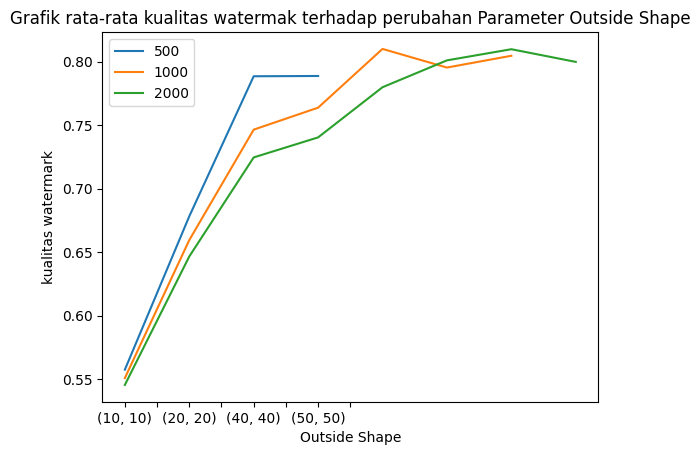

In [25]:
df500 = pd.read_csv("500x500-with-check.csv", index_col=0)
df1000 = pd.read_csv("1000x1000-with-check.csv", index_col=0)
df2000 = pd.read_csv("2000x2000-with-check.csv", index_col=0)
# df_show500 = df500.groupby(["outsideShape"])["psnr"].mean()
# df_show1000 = df1000.groupby(["outsideShape"])["psnr"].mean()
# df_show2000 = df2000.groupby(["outsideShape"])["psnr"].mean()
df_show500 = df500.groupby(["outsideShape"])["robustCheck"].mean()
df_show1000 = df1000.groupby(["outsideShape"])["robustCheck"].mean()
df_show2000 = df2000.groupby(["outsideShape"])["robustCheck"].mean()


def sort_key(x):
    sorted = []
    for i in x:
        sorted.append(int(i[1:-1].split(', ')[0]))
    return sorted


df_show500 = df_show500.sort_index(ascending=True, key=sort_key)
df_show500.plot()
df_show1000 = df_show1000.sort_index(ascending=True, key=sort_key)
df_show1000.plot()
df_show2000 = df_show2000.sort_index(ascending=True, key=sort_key)
plot = df_show2000.plot(
    # title="Grafik rata-rata nilai PSNR terhadap perubahan Parameter Outside Shape",
    title="Grafik rata-rata kualitas watermak terhadap perubahan Parameter Outside Shape",
    # ylabel="PSNR", 
    ylabel="kualitas watermark", 
    xlabel="Outside Shape"
    )
plot.legend(['500', '1000', '2000'])
plt.show()


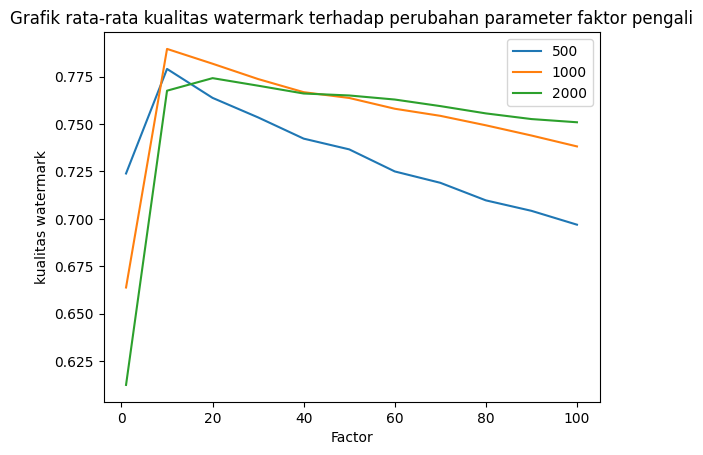

In [19]:
df500 = pd.read_csv("500x500-with-check.csv", index_col=0)
df1000 = pd.read_csv("1000x1000-with-check.csv", index_col=0)
df2000 = pd.read_csv("2000x2000-with-check.csv", index_col=0)
# df_show500 = df500.groupby(["factor"])["psnr"].mean()
# df_show1000 = df1000.groupby(["factor"])["psnr"].mean()
# df_show2000 = df2000.groupby(["factor"])["psnr"].mean()
df_show500 = df500.groupby(["factor"])["robustCheck"].mean()
df_show1000 = df1000.groupby(["factor"])["robustCheck"].mean()
df_show2000 = df2000.groupby(["factor"])["robustCheck"].mean()


def sort_key(x):
    sorted = []
    for i in x:
        sorted.append(int(i))
    return sorted


df_show500 = df_show500.sort_index(ascending=True, key=sort_key)
df_show500.plot()
df_show1000 = df_show1000.sort_index(ascending=True, key=sort_key)
df_show1000.plot()
df_show2000 = df_show2000.sort_index(ascending=True, key=sort_key)
plot = df_show2000.plot(
    # title="Grafik rata-rata nilai PSNR terhadap perubahan parameter faktor pengali",
    title="Grafik rata-rata kualitas watermark terhadap perubahan parameter faktor pengali",
    # ylabel="PSNR", 
    ylabel="kualitas watermark", 
    xlabel="Factor",
    )
plot.legend(['500', '1000', '2000'])
plt.show()

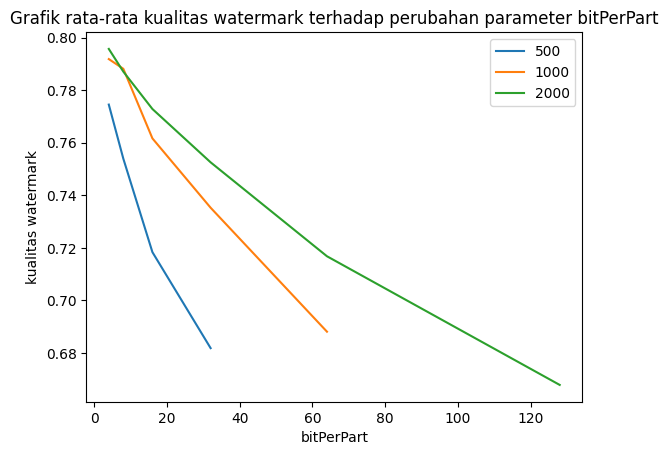

In [20]:
df500 = pd.read_csv("500x500-with-check.csv", index_col=0)
df1000 = pd.read_csv("1000x1000-with-check.csv", index_col=0)
df2000 = pd.read_csv("2000x2000-with-check.csv", index_col=0)
# df_show500 = df500.groupby(["bitPerPart"])["psnr"].mean()
# df_show1000 = df1000.groupby(["bitPerPart"])["psnr"].mean()
# df_show2000 = df2000.groupby(["bitPerPart"])["psnr"].mean()
df_show500 = df500.groupby(["bitPerPart"])["robustCheck"].mean()
df_show1000 = df1000.groupby(["bitPerPart"])["robustCheck"].mean()
df_show2000 = df2000.groupby(["bitPerPart"])["robustCheck"].mean()


def sort_key(x):
    sorted = []
    for i in x:
        sorted.append(int(i))
    return sorted


df_show500 = df_show500.sort_index(ascending=True, key=sort_key)
df_show500.plot()
df_show1000 = df_show1000.sort_index(ascending=True, key=sort_key)
df_show1000.plot()
df_show2000 = df_show2000.sort_index(ascending=True, key=sort_key)
plot = df_show2000.plot(
    # title="Grafik rata-rata nilai PSNR terhadap perubahan parameter bitPerPart",
    title="Grafik rata-rata kualitas watermark terhadap perubahan parameter bitPerPart",
    # ylabel="PSNR", 
    ylabel="kualitas watermark", 
    xlabel="bitPerPart",
    )
plot.legend(['500', '1000', '2000'])
plt.show()

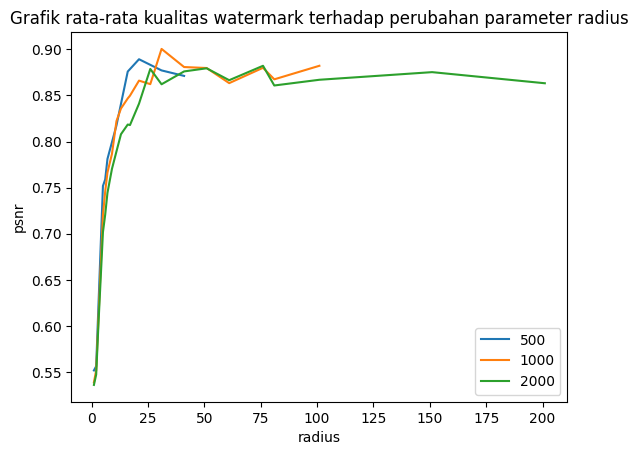

In [11]:
df500 = pd.read_csv("500x500-with-check.csv", index_col=0)
df1000 = pd.read_csv("1000x1000-with-check.csv", index_col=0)
df2000 = pd.read_csv("2000x2000-with-check.csv", index_col=0)
# df_show500 = df500.groupby(["radius"])["psnr"].mean()
# df_show1000 = df1000.groupby(["radius"])["psnr"].mean()
# df_show2000 = df2000.groupby(["radius"])["psnr"].mean()
df_show500 = df500.groupby(["radius"])["robustCheck"].mean()
df_show1000 = df1000.groupby(["radius"])["robustCheck"].mean()
df_show2000 = df2000.groupby(["radius"])["robustCheck"].mean()


def sort_key(x):
    sorted = []
    for i in x:
        sorted.append(int(i))
    return sorted


df_show500 = df_show500.sort_index(ascending=True, key=sort_key)
df_show500.plot()
df_show1000 = df_show1000.sort_index(ascending=True, key=sort_key)
df_show1000.plot()
df_show2000 = df_show2000.sort_index(ascending=True, key=sort_key)
plot = df_show2000.plot(
    title="Grafik rata-rata kualitas watermark terhadap perubahan parameter radius",
    # title="Grafik rata-rata nilai PSNR terhadap perubahan parameter radius",
    ylabel="psnr",
    # ylabel="robust watermark",
    xlabel="radius",
)
plot.legend(['500', '1000', '2000'])
plt.show()

In [3]:

df2000 = pd.read_csv("2000x2000-with-check.csv", index_col=0)
print(df2000.head(1))
tes = df2000.groupby(["radius"])["robustCheck"].nlargest(1)
for i in tes.index:
    print(i[1])
    print(df2000.iloc[i[1]])
    break
print(tes[1])
# print(tes.iloc[0])
# print(tes.iloc[1])
# print(tes.index)
# print(tes)

          filename outsideShape  factor  bitPerPart  radius       psnr  \
0  10-10-1-4-1.png     (10, 10)       1           4       1  46.434617   

   robustCheck  fragileRedCheck  fragileGreenCheck  fragileBlueCheck  
0     0.775126              1.0                1.0               1.0  


In [ ]:
imageData = multiplewatermark.readImage("test-2000x2000.png")
multiplewatermark.processEmbedMultipleWatermarkColor(
    imageData, "thor", (40, 40), 20, False, True, "watermarked", "out.png", 8, 17)


In [ ]:
watermarked = multiplewatermark.readImage("watermarked/out - Copy.png")
multiplewatermark.processExtractMultipleWatermarkColor(
    watermarked, imageData, "thor", (250, 250), 30, 16, 26)


In [ ]:
watermarked = multiplewatermark.readImage("watermarked/out - edit.png")
multiplewatermark.processExtractMultipleWatermarkColor(
    watermarked, imageData, "thor", (250, 250), 30, 16, 26)


In [ ]:
imageData = multiplewatermark.readImage("test-2000x2000.png")
insidePartR, outsidePartR = multiplewatermark.splitImage(
    imageData[:, :, 0], (500, 500))
insidePartG, outsidePartG = multiplewatermark.splitImage(
    imageData[:, :, 1], (500, 500))
insidePartB, outsidePartB = multiplewatermark.splitImage(
    imageData[:, :, 2], (500, 500))
Image.fromarray(insidePartR).save("attachment/crop-inside-r.png")
Image.fromarray(insidePartG).save("attachment/crop-inside-g.png")
Image.fromarray(insidePartB).save("attachment/crop-inside-b.png")

inside = np.zeros(
    insidePartB.shape + (3,), dtype=np.uint8)
inside[:, :, 0] = insidePartR
inside[:, :, 1] = insidePartG
inside[:, :, 2] = insidePartB
Image.fromarray(inside).save("attachment/crop-inside.png")

for i, _ in tqdm(enumerate(outsidePartB)):
    for j, d in enumerate(outsidePartB[i]):
        size = d.shape + (3,)
        outside = np.zeros(size, dtype=np.uint8)
        outside[:, :, 0] = outsidePartR[i][j]
        outside[:, :, 1] = outsidePartG[i][j]
        outside[:, :, 2] = outsidePartB[i][j]
        Image.fromarray(outside).save(
            "attachment/crop-outside-{}-{}.png".format(i, j))

sampleOutsidePart = multiplewatermark.readImage(
    "attachment/crop-outside-0-0.png")
sampleOutsidePartYUV = multiplewatermark.rgbToYUV(sampleOutsidePart)
Image.fromarray(sampleOutsidePartYUV).save("attachment/sample-outside-yuv.png")
Image.fromarray(sampleOutsidePartYUV[:, :, 0]).save(
    "attachment/sample-outside-y.png")
Image.fromarray(sampleOutsidePartYUV[:, :, 1]).save(
    "attachment/sample-outside-u.png")
Image.fromarray(sampleOutsidePartYUV[:, :, 2]).save(
    "attachment/sample-outside-v.png")
